In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np



# Note for Reproducibility
The code below uses a map taken from City of Toronto Open Data Portal and python library GeoPandas. 

In [2]:
file_path = 'https://raw.githubusercontent.com/Alesr33/HW-Sta130/refs/heads/main/real-estate-data.csv'
data = pd.read_csv(file_path, low_memory=False)

In [3]:
data.head()

,id_,ward,beds,baths,DEN,size,parking,exposure,D_mkt,building_age,maint,price,lt,lg
0,219129,W13,3.0,3,No,1500-1999 sqft,N,No,16.0,9,1087.0,1821000.0,43.617997,-79.392383
1,757581,W13,1.0,1,YES,500-999 sqft,Yes,We,23.0,3,469.0,613000.0,43.648968,-79.390031
2,404196,W13,2.0,2,YES,500-999 sqft,Yes,We,12.0,1,767.0,838000.0,43.641045,-79.375436
3,821441,W13,2.0,2,No,500-999 sqft,Yes,S,10.0,25,827.0,935000.0,43.642122,-79.370250
4,612090,W10,2.0,1,No,NaN,N,S,5.0,1,NaN,1328000.0,43.692210,-79.365015


In [4]:
data.info

<bound method DataFrame.info of          id_ ward  beds  baths  DEN            size parking exposure  D_mkt  \
0     219129  W13   3.0      3   No  1500-1999 sqft       N       No   16.0   
1     757581  W13   1.0      1  YES    500-999 sqft     Yes       We   23.0   
2     404196  W13   2.0      2  YES    500-999 sqft     Yes       We   12.0   
3     821441  W13   2.0      2   No    500-999 sqft     Yes        S   10.0   
4     612090  W10   2.0      1   No             NaN       N        S    5.0   
...      ...  ...   ...    ...  ...             ...     ...      ...    ...   
3037  715398  W13   2.0      2   No  1500-1999 sqft       N        S    1.0   
3038  104338  W10   1.0      1  YES      0-499 sqft       N        E    2.0   
3039  476334  W13   2.0      2  YES  1500-1999 sqft     Yes       No    0.0   
3040  413482  W10   1.0      1  YES    500-999 sqft       N       No    7.0   
3041  484367  W13   1.0      1  YES    500-999 sqft     Yes       We    2.0   

      building_age 

In [5]:
data.shape

(3042, 14)

In [6]:
data_subset1 = data[['DEN', 
                    'price']].dropna()


In [7]:
data_subset1.head()

,DEN,price
0,No,1821000.0
1,YES,613000.0
2,YES,838000.0
3,No,935000.0
4,No,1328000.0


In [8]:
data_subset1.shape

(2981, 2)

In [9]:
data_subset1.info

<bound method DataFrame.info of       DEN      price
0      No  1821000.0
1     YES   613000.0
2     YES   838000.0
3      No   935000.0
4      No  1328000.0
...   ...        ...
3037   No  1657000.0
3038  YES   589000.0
3039  YES  1386000.0
3040  YES   774000.0
3041  YES   540000.0

[2981 rows x 2 columns]>

In [10]:
mean_value = data_subset1['price'].mean()
print(mean_value)

893422.0060382423


In [11]:
min_value = data_subset1['price'].min()
print(min_value)

298000.0


In [12]:
max_value = data_subset1['price'].max()
print(max_value)

5688000.0


In [13]:
import matplotlib.pyplot as plt

In [14]:
mean_price_yes_den = data_subset1[data_subset1['DEN'] == 'YES']['price'].mean()

# Print the result
print(f"Mean price for rows with DEN = 'YES': {mean_price_yes_den}")

Mean price for rows with DEN = 'YES': 925702.2471910112


In [15]:
mean_price_no_den = data_subset1[data_subset1['DEN'] == 'No']['price'].mean()

# Print the result
print(f"Mean price for rows with DEN = 'No': {mean_price_no_den}")

Mean price for rows with DEN = 'No': 875400.4181913225


In [16]:
925702.2471910112 - 875400.4181913225

50301.82899968873

In [17]:
# Extract the midpoint of the size range
def extract_midpoint(size_range):
    lower, upper = size_range.split(' ')[0].split('-')  # Split the range
    return (int(lower) + int(upper)) / 2               # Calculate the midpoint

# Create a new column with the midpoint
data_clean = data.dropna()
data_clean['size_midpoint'] = data_clean['size'].apply(extract_midpoint)

# Plot the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data_clean['size_midpoint'], data_clean['price'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Size (Midpoint in sqft)')
plt.ylabel('Price')
plt.title('Size vs Price')

# Show the plot
plt.grid()
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

In [18]:
temp = data.dropna()
temp.info

<bound method DataFrame.info of          id_ ward  beds  baths  DEN            size parking exposure  D_mkt  \
0     219129  W13   3.0      3   No  1500-1999 sqft       N       No   16.0   
1     757581  W13   1.0      1  YES    500-999 sqft     Yes       We   23.0   
2     404196  W13   2.0      2  YES    500-999 sqft     Yes       We   12.0   
3     821441  W13   2.0      2   No    500-999 sqft     Yes        S   10.0   
5     190492  W10   0.0      1   No    500-999 sqft     Yes        S    1.0   
...      ...  ...   ...    ...  ...             ...     ...      ...    ...   
3037  715398  W13   2.0      2   No  1500-1999 sqft       N        S    1.0   
3038  104338  W10   1.0      1  YES      0-499 sqft       N        E    2.0   
3039  476334  W13   2.0      2  YES  1500-1999 sqft     Yes       No    0.0   
3040  413482  W10   1.0      1  YES    500-999 sqft       N       No    7.0   
3041  484367  W13   1.0      1  YES    500-999 sqft     Yes       We    2.0   

      building_age 

In [19]:
size_value_at_300 = temp.iloc[368]['size']
print(size_value_at_300)

0-499 sqft


In [20]:
search_value = '500-999 sqft'  # Replace with the value you're searching for
matching_rows = temp[temp['size'] == search_value]

# Display the matching rows
print(matching_rows)

         id_ ward  beds  baths  DEN          size parking exposure  D_mkt  \
1     757581  W13   1.0      1  YES  500-999 sqft     Yes       We   23.0   
2     404196  W13   2.0      2  YES  500-999 sqft     Yes       We   12.0   
3     821441  W13   2.0      2   No  500-999 sqft     Yes        S   10.0   
5     190492  W10   0.0      1   No  500-999 sqft     Yes        S    1.0   
6     194328  W11   1.0      1  YES  500-999 sqft       N        S    4.0   
...      ...  ...   ...    ...  ...           ...     ...      ...    ...   
3030  675362  W13   2.0      2   No  500-999 sqft       N        S    3.0   
3031  796605  W13   2.0      2   No  500-999 sqft     Yes       No    3.0   
3032  433877  W13   2.0      2   No  500-999 sqft     Yes       No    1.0   
3040  413482  W10   1.0      1  YES  500-999 sqft       N       No    7.0   
3041  484367  W13   1.0      1  YES  500-999 sqft     Yes       We    2.0   

      building_age  maint      price         lt         lg  
1             

In [21]:
search_value = 613000  # Replace with the value you're searching for
matching_rows = temp[temp['price'] == search_value]

# Display the matching rows
print(matching_rows)

         id_ ward  beds  baths  DEN          size parking exposure  D_mkt  \
1     757581  W13   1.0      1  YES  500-999 sqft     Yes       We   23.0   
299   370435  W10   1.0      1  YES  500-999 sqft       N        E    7.0   
2216  664608  W13   3.0      3   No  500-999 sqft       N       No   50.0   

      building_age  maint     price         lt         lg  
1                3  469.0  613000.0  43.648968 -79.390031  
299             14  374.0  613000.0  43.684085 -79.389053  
2216             2  657.0  613000.0  43.636434 -79.421224  


In [22]:
search_value = 43.617997  # Replace with the value you're searching for
matching_rows = data[data['lt'] == search_value]

# Display the matching rows
print(matching_rows)

Empty DataFrame
Columns: [id_, ward, beds, baths, DEN, size, parking, exposure, D_mkt, building_age, maint, price, lt, lg]
Index: []


In [23]:
data.info

<bound method DataFrame.info of          id_ ward  beds  baths  DEN            size parking exposure  D_mkt  \
0     219129  W13   3.0      3   No  1500-1999 sqft       N       No   16.0   
1     757581  W13   1.0      1  YES    500-999 sqft     Yes       We   23.0   
2     404196  W13   2.0      2  YES    500-999 sqft     Yes       We   12.0   
3     821441  W13   2.0      2   No    500-999 sqft     Yes        S   10.0   
4     612090  W10   2.0      1   No             NaN       N        S    5.0   
...      ...  ...   ...    ...  ...             ...     ...      ...    ...   
3037  715398  W13   2.0      2   No  1500-1999 sqft       N        S    1.0   
3038  104338  W10   1.0      1  YES      0-499 sqft       N        E    2.0   
3039  476334  W13   2.0      2  YES  1500-1999 sqft     Yes       No    0.0   
3040  413482  W10   1.0      1  YES    500-999 sqft       N       No    7.0   
3041  484367  W13   1.0      1  YES    500-999 sqft     Yes       We    2.0   

      building_age 

In [24]:
!pip install geopandas shapely matplotlib

In [1]:
Below, is the pathfile to the map. For reproductibility, doiwnloading the file from the Portal is required

SyntaxError: invalid syntax (2743541946.py, line 1)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
/opt/conda/lib/python3.11/site-packages/geopandas/io/file.py:391: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  as_dt = pd.to_datetime(df[k])
/opt/conda/lib/python3.11/site-packages/geopandas/io/file.py:398: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  as_dt = pd.to_datetime(df[k], utc=True)


   _id    AREA_ID      DATE_EFFECTIVE          DATE_EXPIRY  AREA_ATTR_ID  \
0    1  2457740.0 2018-08-07 14:11:06  3000-01-01T00:00:00    25993196.0   
1    2  2457739.0 2018-08-07 14:11:06  3000-01-01T00:00:00    25993195.0   
2    3  2457738.0 2018-08-07 14:11:06  3000-01-01T00:00:00    25993194.0   
3    4  2457737.0 2018-08-07 14:11:06  3000-01-01T00:00:00    25993193.0   
4    5  2457736.0 2018-08-07 14:11:06  3000-01-01T00:00:00    25993192.0   

   AREA_TYPE_ID  PARENT_AREA_ID AREA_TYPE  AREA_CLASS_ID AREA_CLASS  \
0         528.0             0.0      CITW            0.0       None   
1         528.0             0.0      CITW            0.0       None   
2         528.0             0.0      CITW            0.0       None   
3         528.0             0.0      CITW            0.0       None   
4         528.0             0.0      CITW            0.0       None   

  AREA_SHORT_CODE AREA_LONG_CODE                 AREA_NAME  \
0              07             07  Humber River-Black C

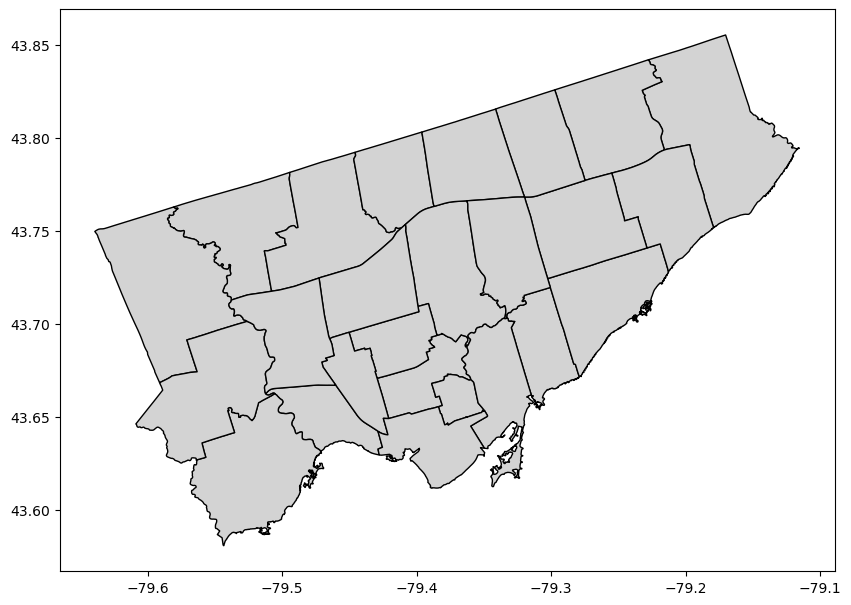

In [25]:
import geopandas as gpd

# Load the GeoJSON file
toronto_map = gpd.read_file("City Wards Data - 4326.geojson")

# Check if the map loaded correctly by displaying the first few rows
print(toronto_map.head())

# Plot the map to visualize it
toronto_map.plot(figsize=(10, 10), color='lightgray', edgecolor='black')
plt.show()

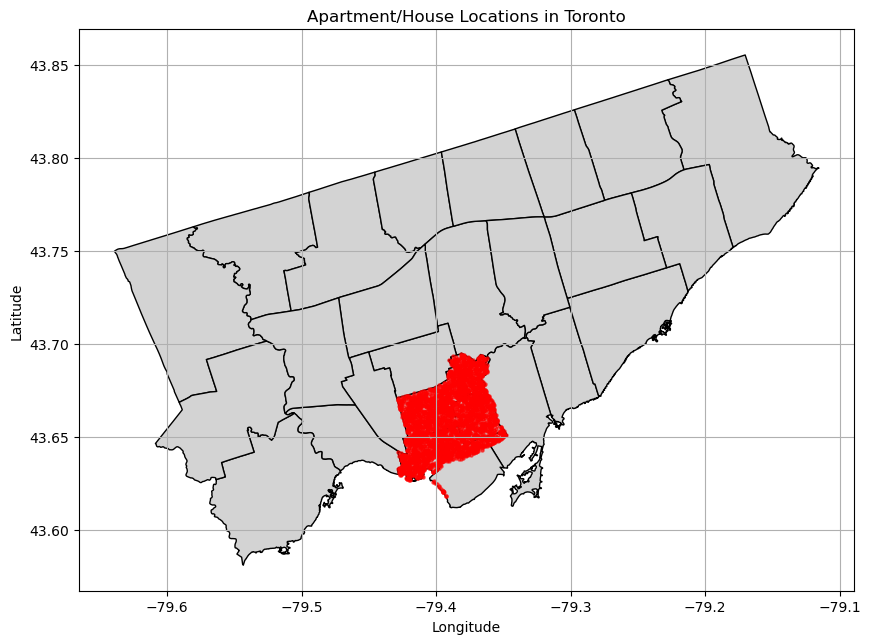

In [26]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(data['lg'], data['lt'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Plot the Toronto map and the data points on top
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot your points (assuming 'lt' and 'lg' are in your data)
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.6)

# Show the map
plt.title("Apartment/House Locations in Toronto")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

In [27]:
data

,id_,ward,beds,baths,DEN,size,parking,exposure,D_mkt,building_age,maint,price,lt,lg
0,219129,W13,3.0,3,No,1500-1999 sqft,N,No,16.0,9,1087.0,1821000.0,43.617997,-79.392383
1,757581,W13,1.0,1,YES,500-999 sqft,Yes,We,23.0,3,469.0,613000.0,43.648968,-79.390031
2,404196,W13,2.0,2,YES,500-999 sqft,Yes,We,12.0,1,767.0,838000.0,43.641045,-79.375436
3,821441,W13,2.0,2,No,500-999 sqft,Yes,S,10.0,25,827.0,935000.0,43.642122,-79.370250
4,612090,W10,2.0,1,No,NaN,N,S,5.0,1,NaN,1328000.0,43.692210,-79.365015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,715398,W13,2.0,2,No,1500-1999 sqft,N,S,1.0,1,1183.0,1657000.0,43.648766,-79.418944
3038,104338,W10,1.0,1,YES,0-499 sqft,N,E,2.0,11,649.0,589000.0,43.672338,-79.377044
3039,476334,W13,2.0,2,YES,1500-1999 sqft,Yes,No,0.0,17,1023.0,1386000.0,43.636830,-79.412187
3040,413482,W10,1.0,1,YES,500-999 sqft,N,No,7.0,25,659.0,774000.0,43.669317,-79.408047


In [28]:
min_lat = data['lt'].min()
max_lat = data['lt'].max()

min_lng = data['lg'].min()
max_lng = data['lg'].max()

# Display the results
print(f"Latitude range: Min = {min_lat}, Max = {max_lat}")
print(f"Longitude range: Min = {min_lng}, Max = {max_lng}")

Latitude range: Min = 43.61799707222609, Max = 43.69455862638775
Longitude range: Min = -79.42831511327837, Max = -79.34831649970063


In [33]:
print(geo_df[['lt', 'lg']].head())

          lt         lg
0  43.617997 -79.392383
1  43.648968 -79.390031
2  43.641045 -79.375436
3  43.642122 -79.370250
4  43.692210 -79.365015


Latitude range: Min = 43.61799707222609, Max = 43.69455862638775
Longitude range: Min = -79.42831511327837, Max = -79.34831649970063


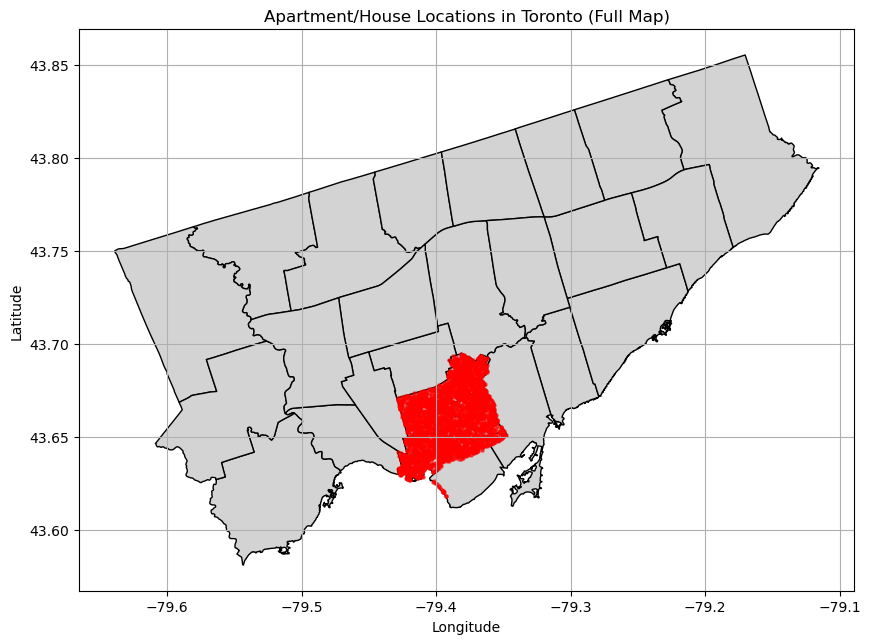

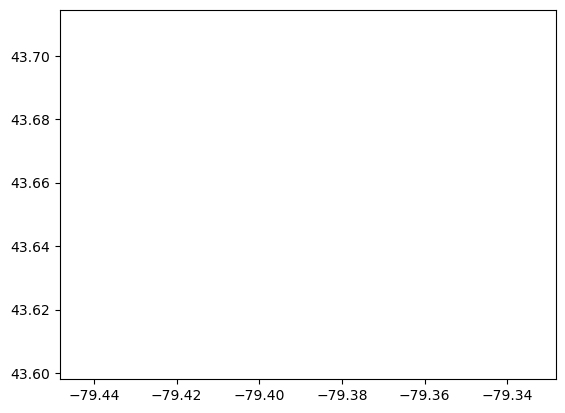

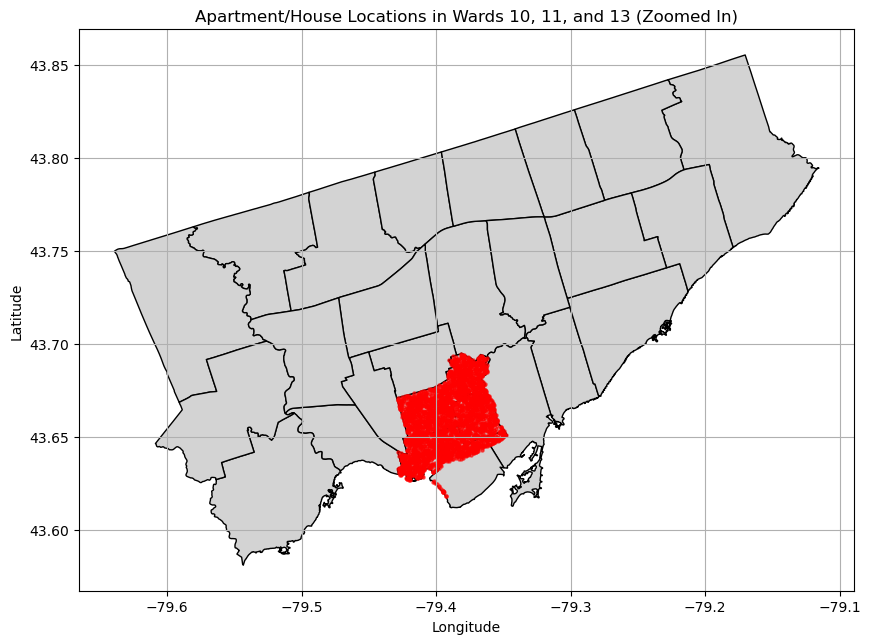

In [34]:
# 1. Check your coordinate range (min/max values)
print(f"Latitude range: Min = {min_lat}, Max = {max_lat}")
print(f"Longitude range: Min = {min_lng}, Max = {max_lng}")

# 2. Plot the full map first (without zoom limits) to confirm the map loads properly
fig, ax = plt.subplots(figsize=(10, 10))
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.6)

plt.title("Apartment/House Locations in Toronto (Full Map)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

# 3. Manually set the zoom range (try adding a buffer around the min/max)
buffer = 0.02  # Adjust this buffer as necessary
plt.xlim([min_lng - buffer, max_lng + buffer])  # Apply buffer for longitude
plt.ylim([min_lat - buffer, max_lat + buffer])  # Apply buffer for latitude

# 4. Plot again with zoomed in region
fig, ax = plt.subplots(figsize=(10, 10))
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.6)

# Title and labels
plt.title("Apartment/House Locations in Wards 10, 11, and 13 (Zoomed In)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

Latitude range: Min = 43.61799707222609, Max = 43.69455862638775
Longitude range: Min = -79.42831511327837, Max = -79.34831649970063


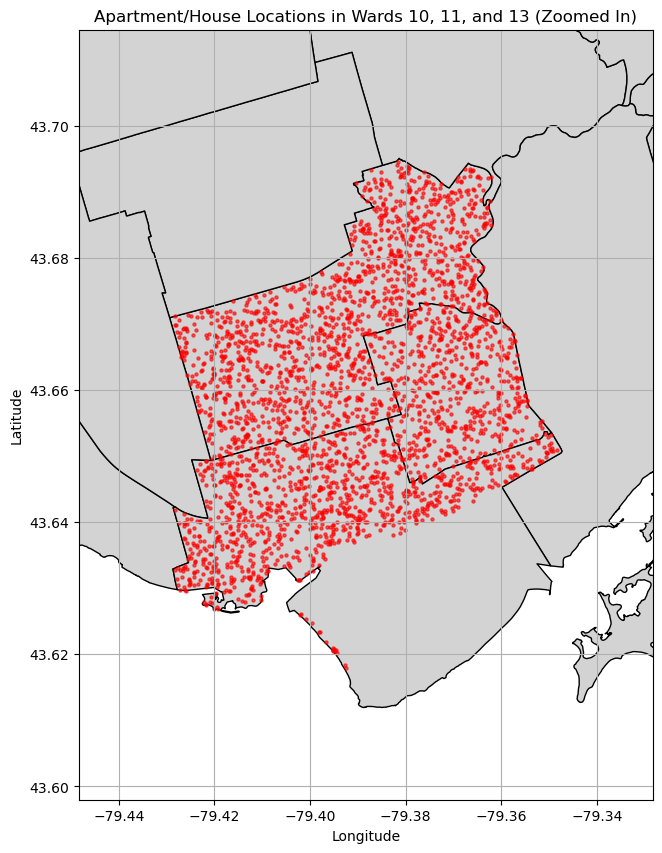

In [35]:
print(f"Latitude range: Min = {min_lat}, Max = {max_lat}")
print(f"Longitude range: Min = {min_lng}, Max = {max_lng}")

# 2. Create the plot with GeoPandas' axes control
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (Toronto's boundaries)
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot your data points on top
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.6)

# Set the axis limits using GeoPandas' set_xlim() and set_ylim()
buffer = 0.02  # You can adjust the buffer as needed
ax.set_xlim([min_lng - buffer, max_lng + buffer])  # Apply buffer for longitude
ax.set_ylim([min_lat - buffer, max_lat + buffer])  # Apply buffer for latitude

# Add title and labels
plt.title("Apartment/House Locations in Wards 10, 11, and 13 (Zoomed In)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

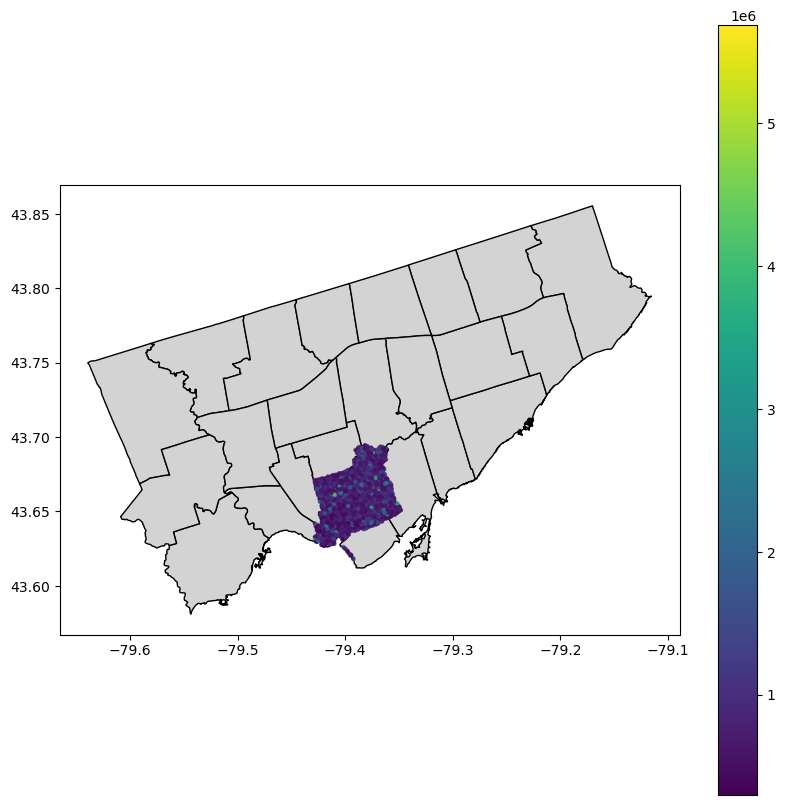

In [36]:
import matplotlib as mpl

# 1. Normalize the price data to the range [0, 1]
norm = mpl.colors.Normalize(vmin=geo_df['price'].min(), vmax=geo_df['price'].max())

# 2. Choose a color map (you can try others like 'plasma', 'inferno', 'coolwarm', etc.)
cmap = plt.cm.viridis  # Change to your preferred colormap

# 3. Plot with the color map applied to 'price'
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (Toronto's boundaries)
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the data points with colors based on 'price'
geo_df.plot(ax=ax, column='price', cmap=cmap, markersize=5, alpha=0.7, legend=True)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array, we don't need actual data here
fig.colorbar(sm)

# Add title and labels
plt.title("Apartment/House Locations with Price Intensity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()


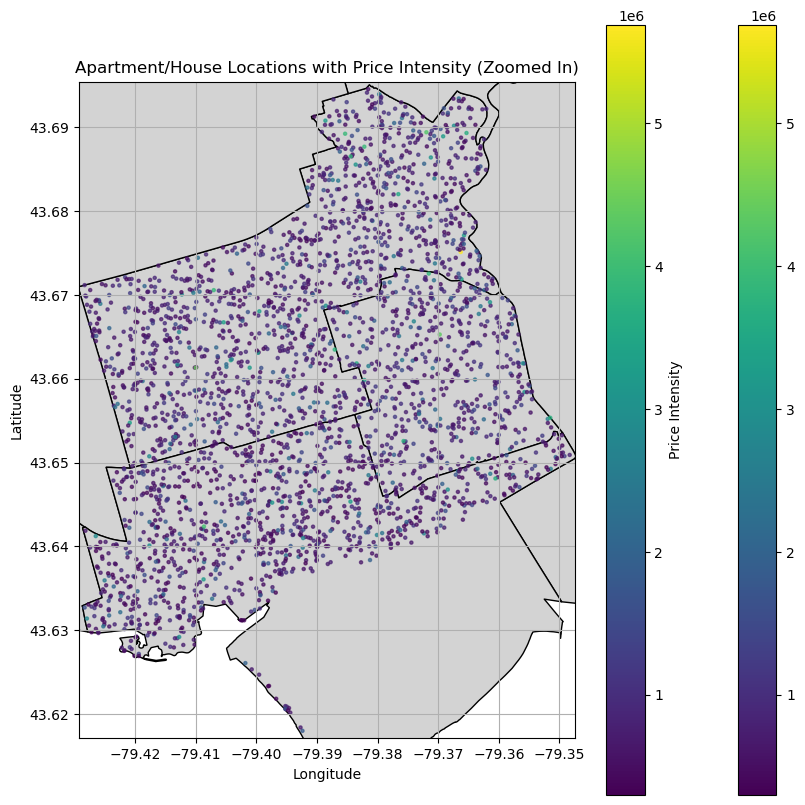

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. Normalize the price data to the range [0, 1]
norm = mpl.colors.Normalize(vmin=geo_df['price'].min(), vmax=geo_df['price'].max())

# 2. Choose a color map (you can try others like 'plasma', 'inferno', 'coolwarm', etc.)
cmap = plt.cm.viridis  # Change to your preferred colormap

# 3. Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (Toronto's boundaries)
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the data points with colors based on 'price'
geo_df.plot(ax=ax, column='price', cmap=cmap, markersize=5, alpha=0.7, legend=True)

# Set the axis limits based on the min/max lat/lng values (zoom)
buffer = 0.0009  # You can adjust this buffer to control the zoom level
ax.set_xlim([min_lng - buffer, max_lng + buffer])  # Apply buffer for longitude
ax.set_ylim([min_lat - buffer, max_lat + buffer])  # Apply buffer for latitude

# Add a color bar explicitly to the same axis (ax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array, we don't need actual data here
cbar = fig.colorbar(sm, ax=ax)  # Explicitly tell where to place the colorbar

# Add label to the color bar
cbar.set_label("Price Intensity")

# Add title and labels
plt.title("Apartment/House Locations with Price Intensity (Zoomed In)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()


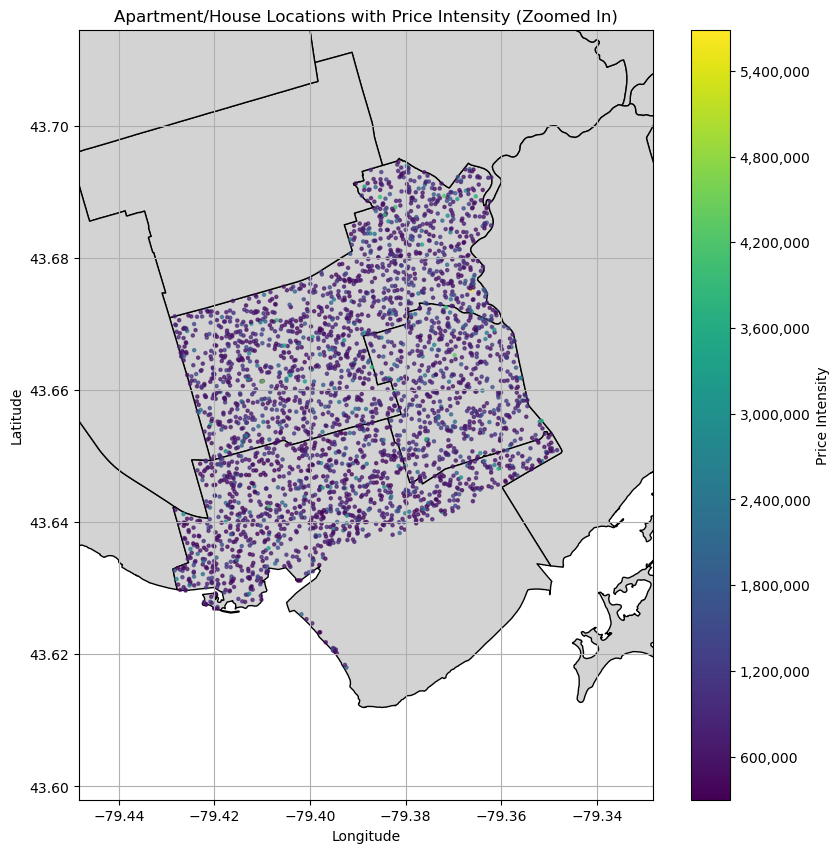

In [56]:
import matplotlib.ticker as ticker

# 1. Normalize the price data to the range [0, 1]
norm = mpl.colors.Normalize(vmin=geo_df['price'].min(), vmax=geo_df['price'].max())

# 2. Choose a color map (you can try others like 'plasma', 'inferno', 'coolwarm', etc.)
cmap = plt.cm.viridis  # Change to your preferred colormap

# 3. Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (Toronto's boundaries)
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the data points with colors based on 'price'
geo_df.plot(ax=ax, column='price', cmap=cmap, markersize=5, alpha=0.7, legend=False)

# Set the axis limits based on the min/max lat/lng values (zoom)
buffer = 0.02  # You can adjust this buffer to control the zoom level
ax.set_xlim([min_lng - buffer, max_lng + buffer])  # Apply buffer for longitude
ax.set_ylim([min_lat - buffer, max_lat + buffer])  # Apply buffer for latitude

# Add a color bar explicitly to the same axis (ax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array, we don't need actual data here
cbar = fig.colorbar(sm, ax=ax)  # Explicitly tell where to place the colorbar

# Format the color bar ticks to correspond to price values
cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=False))  # Allow float values for tick marks
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas

# Add label to the color bar
cbar.set_label("Price Intensity")

# Add title and labels
plt.title("Apartment/House Locations with Price Intensity (Zoomed In)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()


In [39]:
max_price = geo_df['price'].max()
print("Max price:", max_price)

Max price: 5688000.0


In [40]:
max_price = data['price'].max()
print("Max price:", max_price)

Max price: 5688000.0


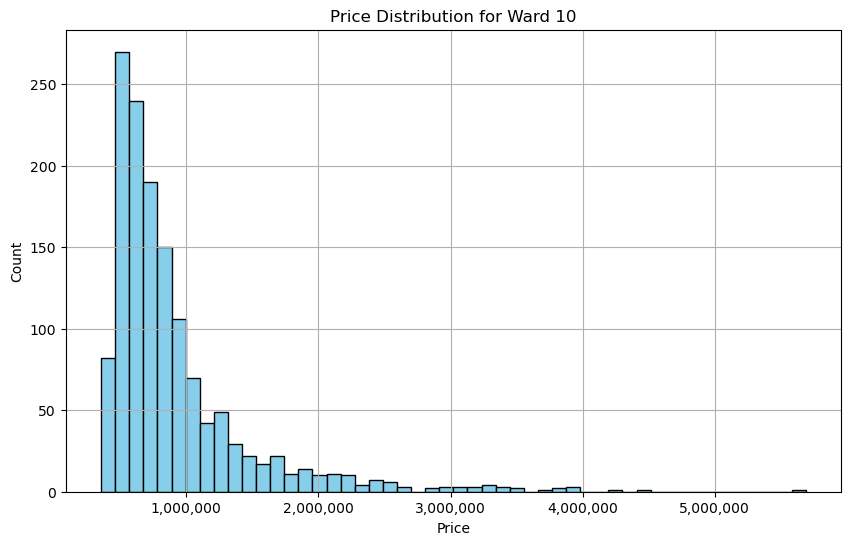

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10'
ward_10_data = geo_df[geo_df['ward'] == 'W10']

# Plot the histogram for the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(ward_10_data['price'].dropna(), bins=50, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Price Distribution for Ward 10')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)

# Format the x-axis to avoid scientific notation and use commas for thousands
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show the plot
plt.show()


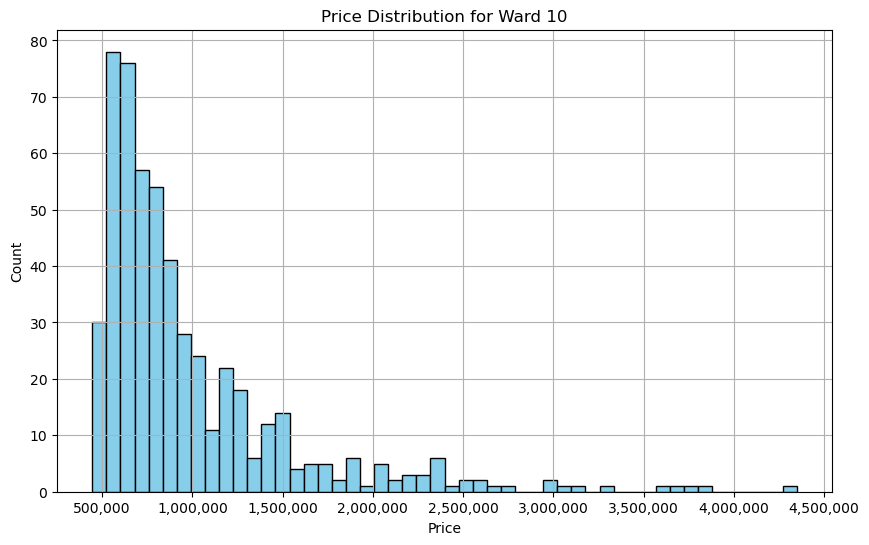

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10'
ward_11_data = geo_df[geo_df['ward'] == 'W11']

# Plot the histogram for the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(ward_11_data['price'].dropna(), bins=50, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Price Distribution for Ward 10')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)

# Format the x-axis to avoid scientific notation and use commas for thousands
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show the plot
plt.show()


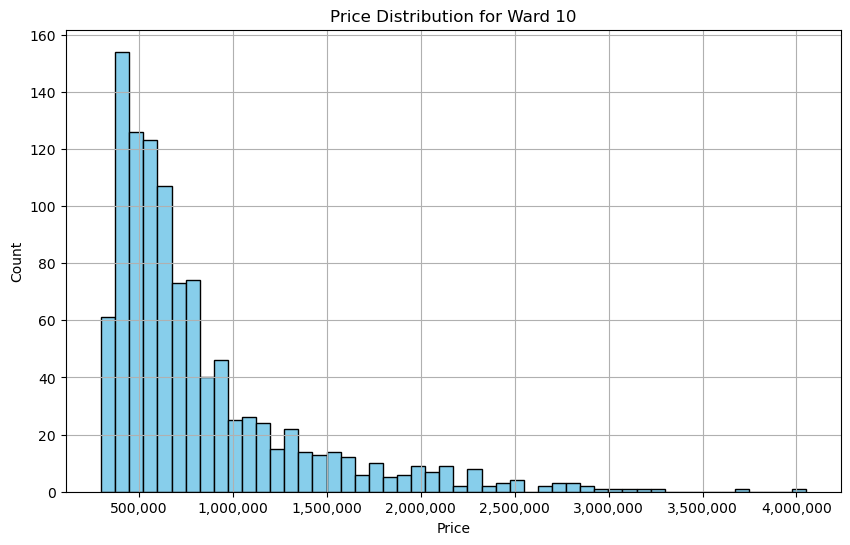

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10'
ward_13_data = geo_df[geo_df['ward'] == 'W13']

# Plot the histogram for the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(ward_13_data['price'].dropna(), bins=50, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Price Distribution for Ward 10')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)

# Format the x-axis to avoid scientific notation and use commas for thousands
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show the plot
plt.show()


In [44]:
average_price10 = ward_10_data['price'].mean()
average_price11 = ward_11_data['price'].mean()
average_price13 = ward_13_data['price'].mean()

# Print the result
print(f"Average Price for Ward 10: {average_price10:,.2f}")
print(f"Average Price for Ward 11: {average_price11:,.2f}")
print(f"Average Price for Ward 13: {average_price13:,.2f}")

Average Price for Ward 10: 910,158.54
Average Price for Ward 11: 982,784.91
Average Price for Ward 13: 826,541.15


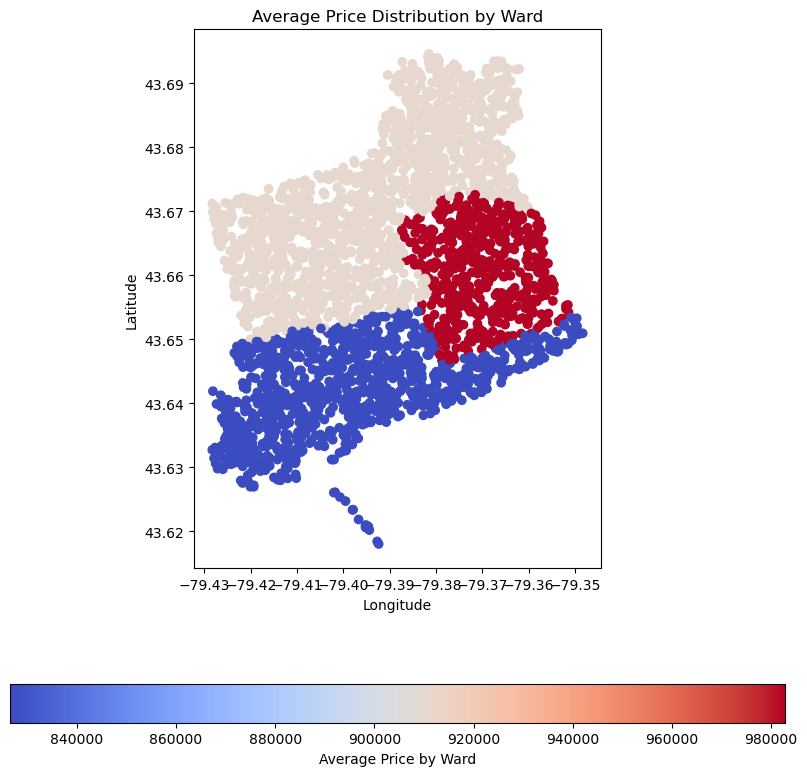

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming geo_df is your GeoDataFrame and you already calculated average prices for each ward

# Create a new column in the geo_df that holds the average price for each ward
# We will assign the values for Ward 10, Ward 11, and Ward 13
# The rest of the wards will get a NaN or some other default value (optional)

geo_df['avg_price'] = geo_df['ward'].map({
    'W10': average_price10,
    'W11': average_price11,
    'W13': average_price13
})

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the choropleth map with the average price
geo_df.plot(column='avg_price', ax=ax, legend=True,
            legend_kwds={'label': "Average Price by Ward",
                         'orientation': "horizontal"},
            cmap='coolwarm')  # You can change the colormap to any other (e.g., 'viridis', 'plasma')

# Add title and axis labels
plt.title("Average Price Distribution by Ward")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


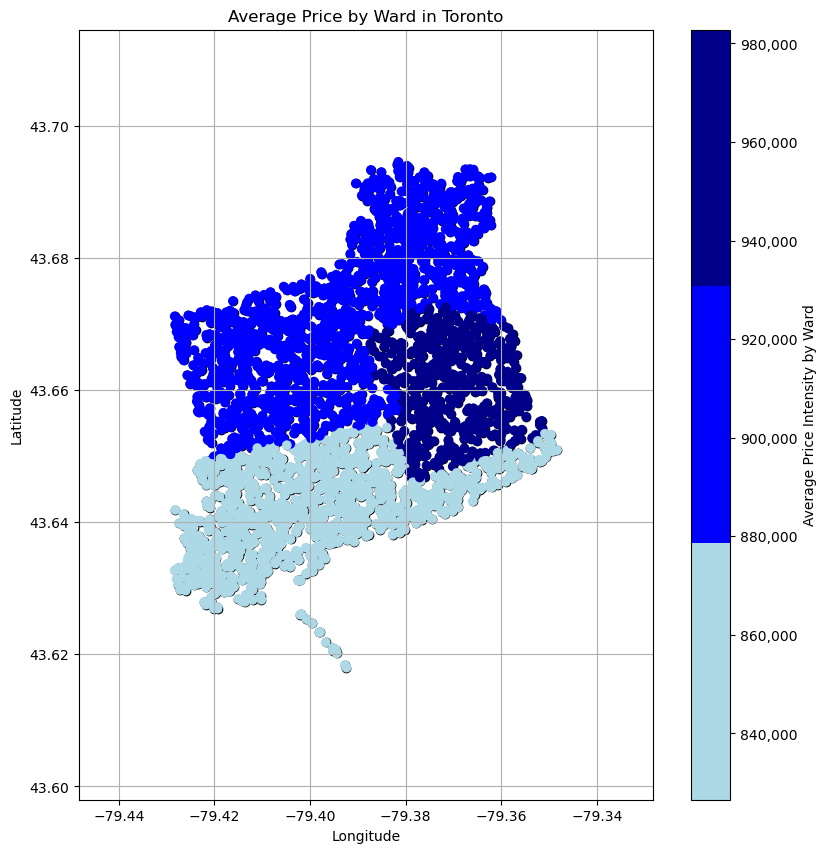

In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

# Define custom color scheme (e.g., light blue, blue, dark blue)
colors = ["#add8e6", "#0000ff", "#00008b"]  # Light blue, blue, dark blue
cmap = mcolors.ListedColormap(colors)

# Assuming 'geo_df' has the ward boundaries and 'avg_price' column
# Add average price data if it's not already present (or make sure it's added)
geo_df['avg_price'] = geo_df['ward'].map({
    'W10': average_price10,
    'W11': average_price11,
    'W13': average_price13
})

# Get the bounds of the geo_df (latitude and longitude extremes)
min_lat, max_lat = geo_df.bounds.miny.min(), geo_df.bounds.maxy.max()
min_lng, max_lng = geo_df.bounds.minx.min(), geo_df.bounds.maxx.max()

# Set the zoom level by focusing on the bounding box of the map
buffer = 0.02  # Adjust this buffer to control zoom level

# 1. Normalize the price data to the range [0, 1]
norm = mcolors.Normalize(vmin=geo_df['avg_price'].min(), vmax=geo_df['avg_price'].max())

# 2. Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (Toronto's boundaries)
geo_df.plot(ax=ax, color='lightgray', edgecolor='black')  # Light gray for wards

# Plot the data points with colors based on 'avg_price' for each ward
geo_df.plot(ax=ax, column='avg_price', cmap=cmap, legend=False)

# Set the axis limits (zooming into the relevant area based on min/max lat/lng)
ax.set_xlim([min_lng - buffer, max_lng + buffer])  # Apply buffer for longitude
ax.set_ylim([min_lat - buffer, max_lat + buffer])  # Apply buffer for latitude

# Add a color bar explicitly to the same axis (ax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array, we don't need actual data here
cbar = fig.colorbar(sm, ax=ax)  # Explicitly tell where to place the colorbar

# Format the color bar ticks to correspond to average price values
cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=False))  # Allow float values for tick marks
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas

# Add label to the color bar
cbar.set_label("Average Price Intensity by Ward")

# Add title and labels
plt.title("Average Price by Ward in Toronto")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()


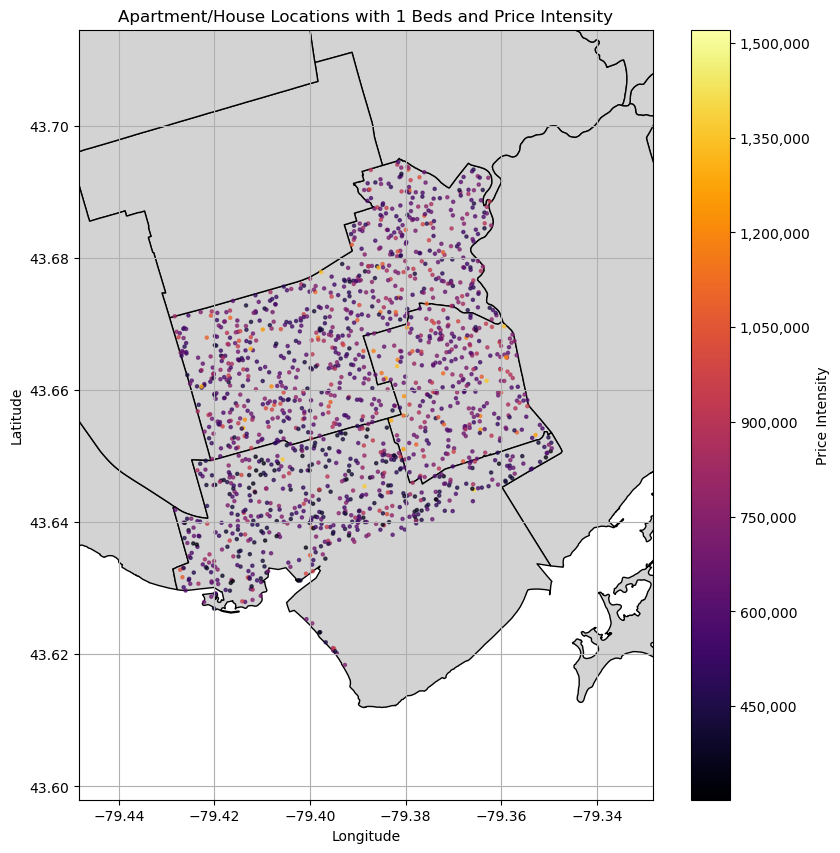

Average Price for Ward 10: 662,246.54
Average Price for Ward 11: 735,165.47
Average Price for Ward 13: 576,587.57


In [66]:
import matplotlib.ticker as ticker

# Filter the data to only include rows where 'beds' is 2.0
filtered_geo_df = geo_df[geo_df['beds'] == 1.0]

# 1. Normalize the price data to the range [0, 1]
norm = mpl.colors.Normalize(vmin=filtered_geo_df['price'].min(), vmax=filtered_geo_df['price'].max())

# 2. Choose a color map (you can try others like 'plasma', 'inferno', 'coolwarm', etc.)
cmap = plt.cm.inferno  # Change to your preferred colormap

# 3. Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (Toronto's boundaries)
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the filtered data points (only rows where 'beds' is 2.0) with colors based on 'price'
filtered_geo_df.plot(ax=ax, column='price', cmap=cmap, markersize=5, alpha=0.7, legend=False)

# Set the axis limits based on the min/max lat/lng values (zoom)
buffer = 0.02  # You can adjust this buffer to control the zoom level
ax.set_xlim([min_lng - buffer, max_lng + buffer])  # Apply buffer for longitude
ax.set_ylim([min_lat - buffer, max_lat + buffer])  # Apply buffer for latitude

# Add a color bar explicitly to the same axis (ax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array, we don't need actual data here
cbar = fig.colorbar(sm, ax=ax)  # Explicitly tell where to place the colorbar

# Format the color bar ticks to correspond to price values
cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=False))  # Allow float values for tick marks
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas

# Add label to the color bar
cbar.set_label("Price Intensity")

# Add title and labels
plt.title("Apartment/House Locations with 1 Beds and Price Intensity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 1.0
ward_10_data_1_beds = geo_df[(geo_df['ward'] == 'W10') & (geo_df['beds'] == 1.0)]

average_price10_beds = ward_10_data_1_beds['price'].mean()

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 1.0
ward_11_data_1_beds = geo_df[(geo_df['ward'] == 'W11') & (geo_df['beds'] == 1.0)]

average_price11_beds = ward_11_data_1_beds['price'].mean()

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 1.0
ward_13_data_1_beds = geo_df[(geo_df['ward'] == 'W13') & (geo_df['beds'] == 1.0)]

average_price13_beds = ward_13_data_1_beds['price'].mean()


# Print the result
print(f"Average Price for Ward 10: {average_price10_beds:,.2f}")
print(f"Average Price for Ward 11: {average_price11_beds:,.2f}")
print(f"Average Price for Ward 13: {average_price13_beds:,.2f}")

In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 2.0
ward_10_data_2_beds = geo_df[(geo_df['ward'] == 'W10') & (geo_df['beds'] == 2.0)]

average_price10_beds = ward_10_data_2_beds['price'].mean()


# Print the result
print(f"Average Price for Ward 10: {average_price10_beds:,.2f}")

Average Price for Ward 10: 1,168,946.81


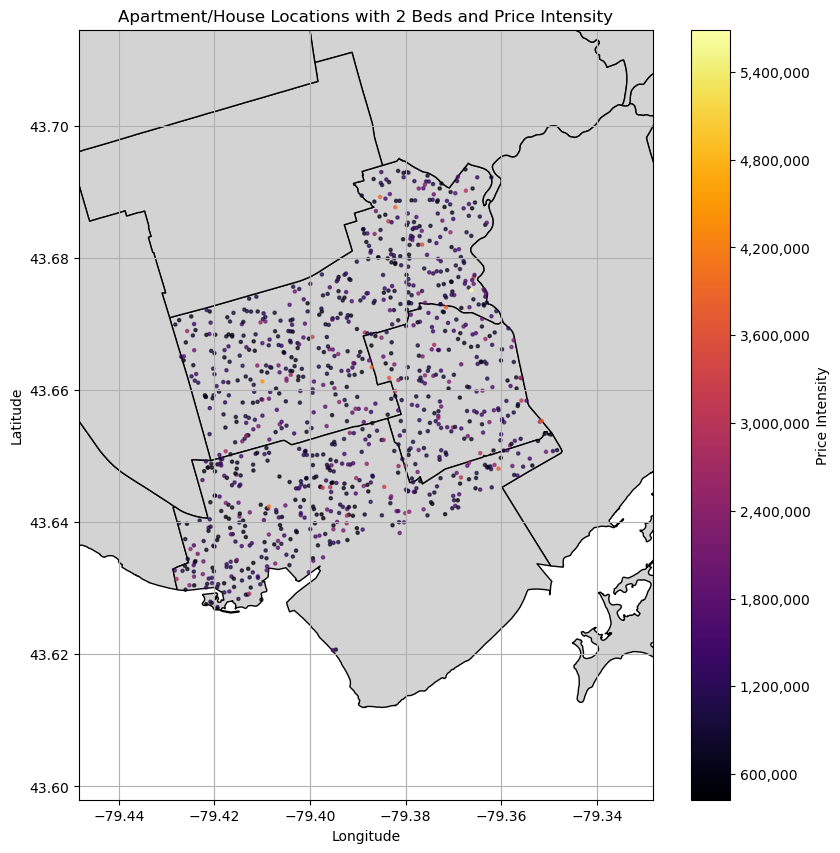

Average Price for Ward 10: 1,168,946.81
Average Price for Ward 11: 735,165.47
Average Price for Ward 13: 1,145,109.29


In [68]:
import matplotlib.ticker as ticker

# Filter the data to only include rows where 'beds' is 2.0
filtered_geo_df = geo_df[geo_df['beds'] == 2.0]

# 1. Normalize the price data to the range [0, 1]
norm = mpl.colors.Normalize(vmin=filtered_geo_df['price'].min(), vmax=filtered_geo_df['price'].max())

# 2. Choose a color map (you can try others like 'plasma', 'inferno', 'coolwarm', etc.)
cmap = plt.cm.inferno  # Change to your preferred colormap

# 3. Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (Toronto's boundaries)
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the filtered data points (only rows where 'beds' is 2.0) with colors based on 'price'
filtered_geo_df.plot(ax=ax, column='price', cmap=cmap, markersize=5, alpha=0.7, legend=False)

# Set the axis limits based on the min/max lat/lng values (zoom)
buffer = 0.02  # You can adjust this buffer to control the zoom level
ax.set_xlim([min_lng - buffer, max_lng + buffer])  # Apply buffer for longitude
ax.set_ylim([min_lat - buffer, max_lat + buffer])  # Apply buffer for latitude

# Add a color bar explicitly to the same axis (ax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array, we don't need actual data here
cbar = fig.colorbar(sm, ax=ax)  # Explicitly tell where to place the colorbar

# Format the color bar ticks to correspond to price values
cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=False))  # Allow float values for tick marks
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas

# Add label to the color bar
cbar.set_label("Price Intensity")

# Add title and labels
plt.title("Apartment/House Locations with 2 Beds and Price Intensity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()


# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 1.0
ward_10_data_2_beds = geo_df[(geo_df['ward'] == 'W10') & (geo_df['beds'] == 2.0)]

average_price10_beds2 = ward_10_data_2_beds['price'].mean()

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 1.0
ward_11_data_2_beds2 = geo_df[(geo_df['ward'] == 'W11') & (geo_df['beds'] == 2.0)]

average_price11_beds2 = ward_11_data_2_beds['price'].mean()

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 1.0
ward_13_data_2_beds = geo_df[(geo_df['ward'] == 'W13') & (geo_df['beds'] == 2.0)]

average_price13_beds2 = ward_13_data_2_beds['price'].mean()


# Print the result
print(f"Average Price for Ward 10: {average_price10_beds2:,.2f}")
print(f"Average Price for Ward 11: {average_price11_beds2:,.2f}")
print(f"Average Price for Ward 13: {average_price13_beds2:,.2f}")

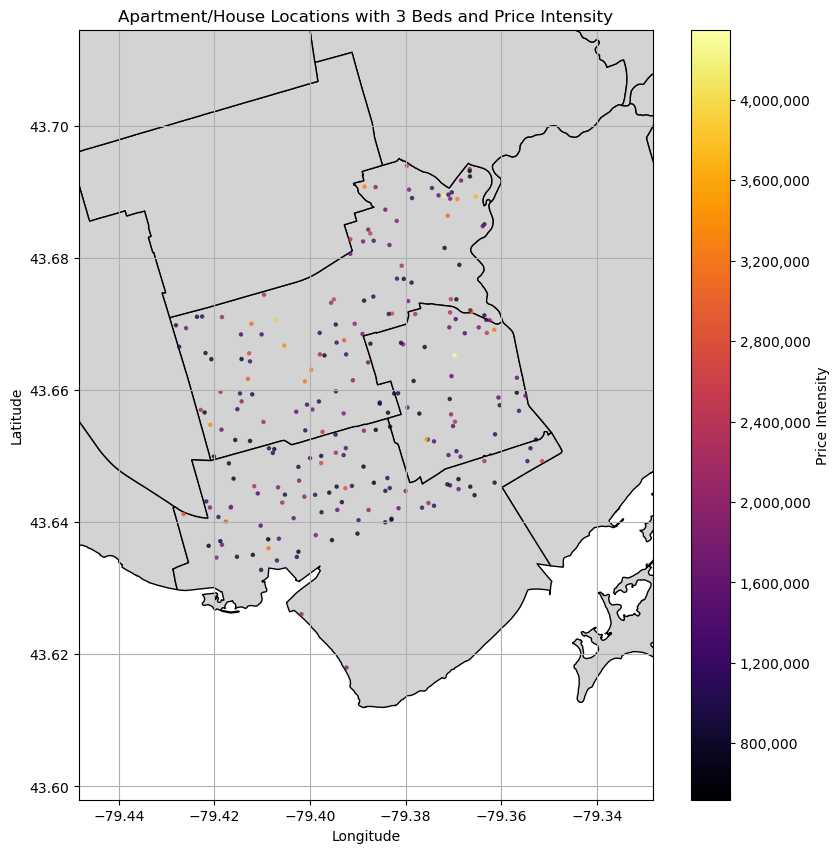

Average Price for Ward 10: 1,691,086.54
Average Price for Ward 11: 1,543,236.84
Average Price for Ward 13: 1,338,240.96


In [69]:
import matplotlib.ticker as ticker

# Filter the data to only include rows where 'beds' is 2.0
filtered_geo_df = geo_df[geo_df['beds'] == 3.0]

# 1. Normalize the price data to the range [0, 1]
norm = mpl.colors.Normalize(vmin=filtered_geo_df['price'].min(), vmax=filtered_geo_df['price'].max())

# 2. Choose a color map (you can try others like 'plasma', 'inferno', 'coolwarm', etc.)
cmap = plt.cm.inferno  # Change to your preferred colormap

# 3. Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (Toronto's boundaries)
toronto_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the filtered data points (only rows where 'beds' is 2.0) with colors based on 'price'
filtered_geo_df.plot(ax=ax, column='price', cmap=cmap, markersize=5, alpha=0.7, legend=False)

# Set the axis limits based on the min/max lat/lng values (zoom)
buffer = 0.02  # You can adjust this buffer to control the zoom level
ax.set_xlim([min_lng - buffer, max_lng + buffer])  # Apply buffer for longitude
ax.set_ylim([min_lat - buffer, max_lat + buffer])  # Apply buffer for latitude

# Add a color bar explicitly to the same axis (ax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array, we don't need actual data here
cbar = fig.colorbar(sm, ax=ax)  # Explicitly tell where to place the colorbar

# Format the color bar ticks to correspond to price values
cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=False))  # Allow float values for tick marks
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas

# Add label to the color bar
cbar.set_label("Price Intensity")

# Add title and labels
plt.title("Apartment/House Locations with 3 Beds and Price Intensity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 1.0
ward_10_data_3_beds = geo_df[(geo_df['ward'] == 'W10') & (geo_df['beds'] == 3.0)]

average_price10_beds3 = ward_10_data_3_beds['price'].mean()

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 1.0
ward_11_data_3_beds = geo_df[(geo_df['ward'] == 'W11') & (geo_df['beds'] == 3.0)]

average_price11_beds3 = ward_11_data_3_beds['price'].mean()

# Ensure the 'price' column is numeric (convert if necessary)
geo_df['price'] = pd.to_numeric(geo_df['price'], errors='coerce')

# Filter the data for rows where 'ward' column has 'W10' and 'beds' column is 1.0
ward_13_data_3_beds = geo_df[(geo_df['ward'] == 'W13') & (geo_df['beds'] == 3.0)]

average_price13_beds3 = ward_13_data_3_beds['price'].mean()


# Print the result
print(f"Average Price for Ward 10: {average_price10_beds3:,.2f}")
print(f"Average Price for Ward 11: {average_price11_beds3:,.2f}")
print(f"Average Price for Ward 13: {average_price13_beds3:,.2f}")